## Group No

## Group Member Names:
1. ASHIQUE ZZAMAN (2021sc04612)



# 1. Import the required libraries

In [1]:
!pip install tensorflow

In [2]:
##---------Type the code below this line------------------##

# Importing Libraries

import time
import numpy as np 
import pandas as pd 

import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, History

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



### Data considered here: 
Fashion-MNIST 

### About Data: 
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

##### The ten fashion class labels include:
1. T-shirt/top
2. Trouser/pants
3. Pullover shirt
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

In [3]:
##---------Type the code below this line------------------##

# loading train and test dataset from tensorflow using keras 

def load_dataset():
    fashion_mnist = keras.datasets.fashion_mnist
    (xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
    
    return xtrain, ytrain, xtest, ytest

In [4]:
xtrain, ytrain, xtest, ytest = load_dataset()

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



In [5]:
# Printing the size of the dataset and printing value of target variable

print("xtrain shape: %s" , (xtrain.shape))
print("ytrain shape: %s and value: %s" % (ytrain.shape, ytrain))
print("xtest shape: %s" , (xtest.shape))
print("ytest shape: %s" , (ytest.shape))


xtrain shape: %s (60000, 28, 28)
ytrain shape: (60000,) and value: [9 0 0 ... 3 0 5]
xtest shape: %s (10000, 28, 28)
ytest shape: %s (10000,)


In [6]:
# Assigning class labels by defining in an array 
# Each item of array represent integer value of labels. 10 clothing item for 10 integer label

class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


##### Displaying the first 25 images from the training set and the class name below each image.

In [7]:
# Displaying the first 25 images from training set

def display_images(xtrain, ytrain):
    plt.figure(figsize=(10,10))
    for i in range(25): 
        
        # Matrix of 5 X 5 array
        plt.subplot(5,5,i+1) 
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        # Printing binary/black and white image
        plt.imshow(xtrain[i], cmap=plt.cm.binary) 
        
        # Assigning name to each image
        plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) 

    plt.show()

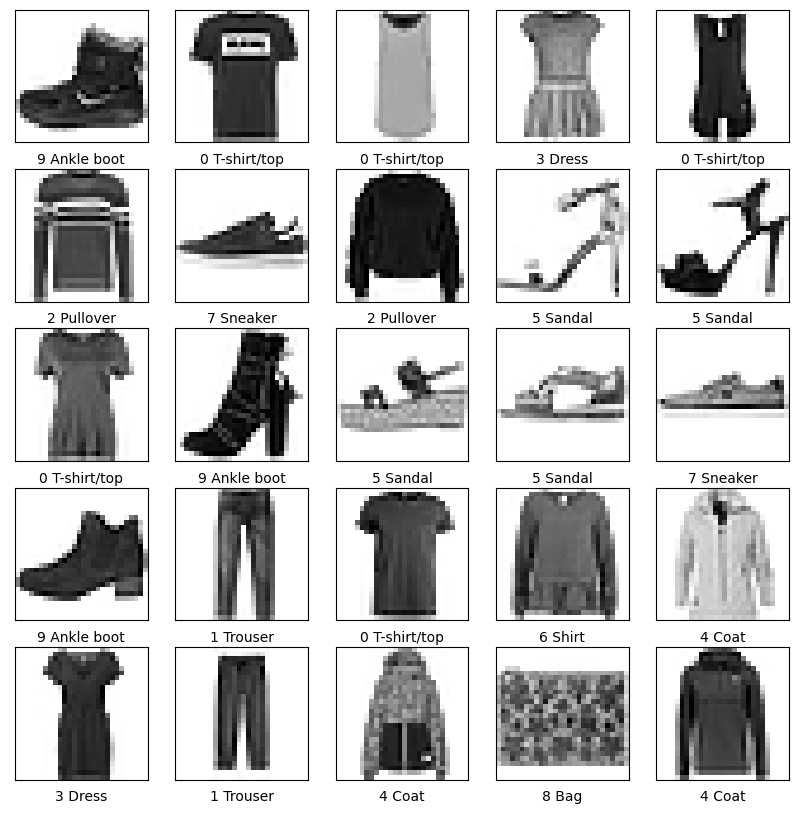

In [8]:
display_images(xtrain, ytrain)

In [9]:
# Verifying wheather the class mapping is correct

class_names[ytrain[5]]

'Pullover'

In [10]:
# Distribution of target classes

np.array(np.unique(ytrain, return_counts=True)).T


array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]], dtype=int64)

In [11]:
# Plotting distribution of the categories of the target / label

def visualize(ytrain, class_names):
    plt.figure(figsize=(15,7))
    p = sns.countplot(ytrain, palette="icefire")
    plt.title("Plotting distribution of the classes")
    p.set(xticklabels=class_names)



F:\EDU\Ananconda\conda_install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


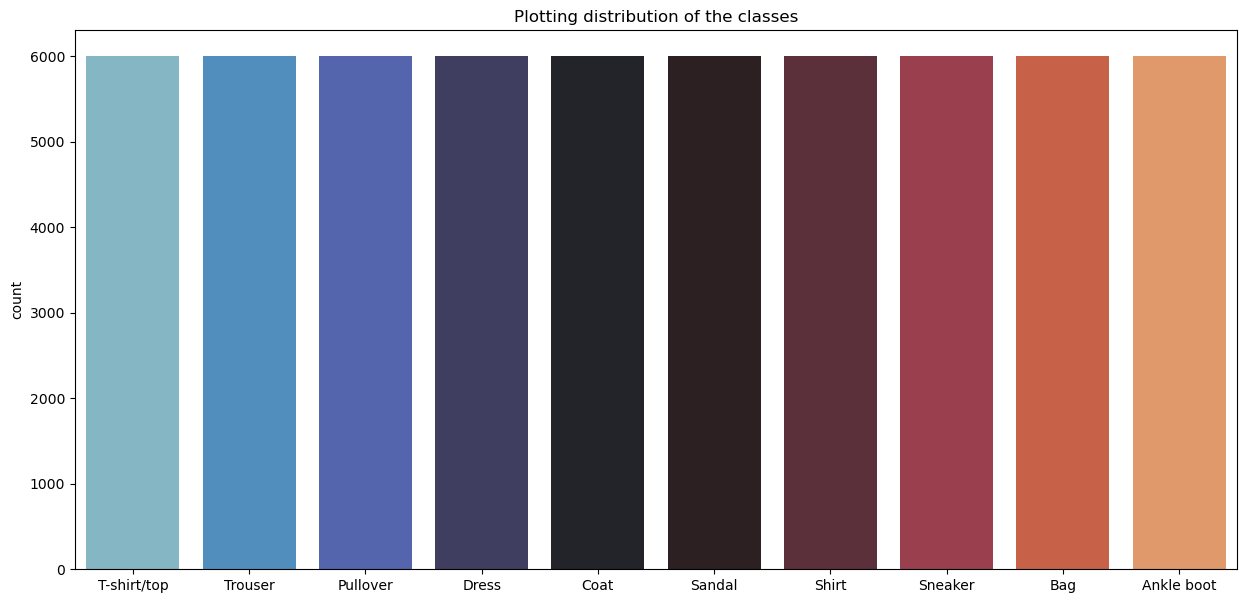

In [12]:
visualize(ytrain, class_names)

##### We can see total 10 classes with equal values. So, there is no need for OverSampling or UnderSampling.

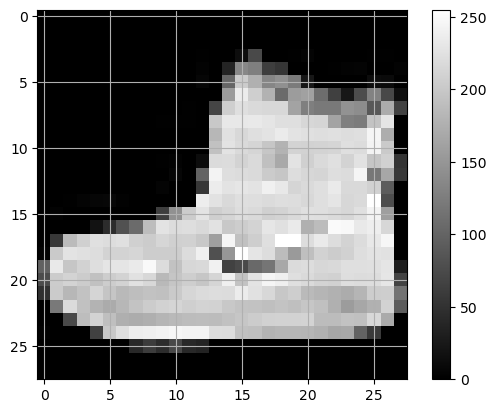

Class ID: 9 and Class name: Ankle boot


In [13]:
# Inspecting the data in the array

index=0 
plt.imshow(xtrain[index], cmap='gray') 
plt.colorbar() 
plt.grid(True) 
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

### Observations:

1. Images are grayscale/single channel and are of 28 x 28 pixels.
2. 60,000 images are assigned to train dataset. 
3. 10,000 images are assigned to test dataset. 
4. Train Images - Array of 60,000 images in 28 X 28 pixels.
5. Train Labels - Integer array of 60,000 labels, value between 0 to 9.
6. Test Images - Array of 10,000 images in 28 X 28 pixels.
7. Test Labels - Integer array of 10,000 labels, value between 0 to 9.
8. Each image mapped to a single label.
9. Each integer value in label array represent clothing item.
10. 10 classes with equal values. So, there is no need for OverSampling or UnderSampling.

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

##### Reshaping the Images
1. We have Images as 1D vector each containing 784 pixels. 
2. Before we feed the data to the DNN we must reshape the data into (28x28x1) 3D matrices. 
3. This is because Keras wants an Extra Dimension in the end, for channels. 
4. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses 1.

In [14]:
##---------Type the code below this line------------------##

# Reshaping

def reshape(xtrain, xtest):
    xtrain=xtrain.reshape((xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
    xtest=xtest.reshape((xtest.shape[0], xtrain.shape[1], xtrain.shape[2], 1))

    # After reshaping

    print("After reshaping")
    print("xtrain shape: ", xtrain.shape)
    print("xtest shape: ", xtest.shape)
    
    return xtrain, xtest

In [15]:
xtrain, xtest = reshape(xtrain, xtest)

After reshaping
xtrain shape:  (60000, 28, 28, 1)
xtest shape:  (10000, 28, 28, 1)


##### One hot encoding of the labels
1. The labels are given as integers between 0-9. We need to one hot encode them, for say 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0].
2. We have 10 digits [0-9] or classes, and that classes are represented as unique integers.
3. We therefore, use an one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.
4. One hot encoding is not required in two-class classification problem. This is required in multi-class classification problem. 
5. Current dataset is 10 class classification problem so after one hot encoding it will generate 10 columns i.e. 10 output neurons for each label.

In [16]:
# Encoding of the labels
# One hot encoding of the labels

def encoding(ytrain, ytest):
    # Before one hot encoding

    print("Before one hot encoding")
    print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
    print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

    ytrain=to_categorical(ytrain)
    ytest=to_categorical(ytest)

    # After one hot encoding

    print("After one hot encoding")
    print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
    print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))
    
    return ytrain, ytest

In [17]:
ytrain, ytest = encoding(ytrain, ytest)

Before one hot encoding
ytrain Shape: (60000,) and value: [9 0 0 ... 3 0 5]
ytest Shape: (10000,) and value: [9 2 1 ... 8 1 5]
After one hot encoding
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


##### Scaling Pixels

1. The value of each pixel in the image data is an integer in the range [0,255], the range that a single 8-bit byte can offer. 
2. In order for Optimization Algorithms to work much faster, they need to be scaled down to the range [0,1]. 
3. So for that we should create a simple normalization function as shown below, and then apply it to each image in the test and train datasets.
4. Normalization is carried out as: x = (x - min) / (max - min) ; Here min=0 and max=255

In [18]:
# Scaling pixels

def scal_pixels(xtrain, xtest):
    xtrain = xtrain.astype('float32') / 255.0
    xtest = xtest.astype('float32') / 255.0
    
    print("x_train shape: ", xtrain.shape)
    print("test shape: ", xtest.shape)
    
    return xtrain, xtest

In [19]:
xtrain, xtest = scal_pixels(xtrain, xtest)

x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [20]:
##---------Type the code below this line------------------##

# Showing shape and value of target variable

print("xtrain shape: " , (xtrain.shape))
print("ytrain shape: " , (ytrain.shape))

xtrain shape:  (60000, 28, 28, 1)
ytrain shape:  (60000, 10)


## 3.3 Split the data into training set and testing set

In [21]:
# ##---------Type the code below this line------------------##

#### ***We used built in dataset from the Tensorflow / Keras where the dataset is split into training and testing sets for model evaluation.

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [22]:
##---------Type the answer below this line------------------##

# Size of the training dataset valid dataset and testing dataset


print("xtrain shape: ", xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("yvalid shape: ", ytest.shape)
print("ytrain shape: ", ytest.shape)

xtrain shape:  (60000, 28, 28, 1)
ytrain shape:  (60000, 10)
yvalid shape:  (10000, 10)
ytrain shape:  (10000, 10)


### Preprocessing report

##### Reshaping the Images
1. We have Images as 1D vector each containing 784 pixels. 
2. Before we feed the data to the DNN we must reshape the data into (28x28x1) 3D matrices. 
3. This is because Keras wants an Extra Dimension in the end, for channels. 
4. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses 1.

##### One hot encoding of the labels
1. The labels are given as integers between 0-9. We need to one hot encode them, for say 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0].
2. We have 10 digits [0-9] or classes, and that classes are represented as unique integers.
3. We therefore, use an one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.
4. One hot encoding is not required in two-class classification problem. This is required in multi-class classification problem. 
5. Current dataset is 10 class classification problem so after one hot encoding it will generate 10 columns i.e. 10 output neurons for each label.

##### Scaling Pixels

1. The value of each pixel in the image data is an integer in the range [0,255], the range that a single 8-bit byte can offer. 
2. In order for Optimization Algorithms to work much faster, they need to be scaled down to the range [0,1]. 
3. So for that we should create a simple normalization function as shown below, and then apply it to each image in the test and train datasets.
4. Normalization is carried out as: x = (x - min) / (max - min) ; Here min=0 and max=255

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [23]:
# Assigning model hyperparameters

num_classes = len(class_names)
batch_size = 32
epochs = 20


In [24]:
print(xtrain.shape)

(60000, 28, 28, 1)


In [25]:
##---------Type the code below this line------------------##

# Defining DNN model

def define_model(xtrain, num_classes):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model.add(keras.layers.Dense(units=256,activation="relu"))
    model.add(keras.layers.Dense(units=128,activation="relu"))
    
    model.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model



In [26]:
model = define_model(xtrain, num_classes)

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [27]:
##---------Type the answer below this line------------------##

# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Model report

def model_report(model):
    # Number of layers
    num_layers = len(model.layers)
    print("Number of layers: ", num_layers)

    # Number of units in each layer
    units_per_layer = [layer.units for layer in model.layers[-3:]]
    print("Number of units in each layer: ", units_per_layer)

    # Total number of trainable parameters
    total_trainable_params = model.count_params()
    print("Total number of trainable parameters: ", total_trainable_params)



In [29]:
model_report(model)

Number of layers:  4
Number of units in each layer:  [256, 128, 10]
Total number of trainable parameters:  235146


### DNN Model Report

#### Explanation of the model we have built -

##### 1. Sequential Model: 
First, Sequential Keras API is used in which we have single stack of layers connected sequentially.

##### 2. Setting up the layers:
The core element of a neural network is the layer. A layer help us to extracts a representation of the input data. A series of connected layers gives a meaningful representation for the problem to be solved.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

##### 3. Layers:
Our model has four layers: <br>
<b>I. Input (tf.keras.layers.Flatten):</b> Image input is in form of a 28x28x1 vector (1 as it is a black and white image , if these were colored images we would have used 28x28x3) , so we flatten the input with all values stacked in a single column containing 28x28x1=784 rows

<b>II. Hidden (tf.keras.layers.Dense):</b><br> 
<b>a.</b> A densely connected layer hidden layer using of 256 neurons with activation function relu. <br>
<b>b.</b> Another densely connected layer hidden layer using of 128 neurons with activation function relu.

Each hidden layer manages weights and bias vectors connected between neurons and inputs. The principe is very simple - Each neuron takes as input the 784 nodes of the previous layer, weighting these inputs according to hidden parameters (weights )that will be learned during the training, then sends a unique value to the next layer.
Dense layer means all the neurons of this layer are connected to every neuron of its preceding layer.

<b>III. Output (tf.keras.layers.Dense):</b> A 10-neuron softmax (Activation Function) layer. 10 beacuse we have 10 target classes and using softmax activation function because the classes are exclusive. Each neuron represents a class of clothing. As in the previous layer, each neuron takes input from the 128 nodes in the layer before it, weights thats input according to learned parameters, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 neuron values is 1.


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

### Compiling the model

Once model is ready compile() method is called to specify the loss function, the optimizer and the metrics we intend to use.

##### The model is ready for training but it needs a few more settings. These are added during the compiling step:
<b>1. Loss function:</b> An algorithm for measuring how far the model's outputs are from the desired output. The "categorical_crossentropy" loss function will be optimized, suitable for multi-class classification. For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".<br> 
<b>2. Optimizer:</b> An algorithm to adjust the internal parameters of the model to minimize loss. Simple Stochastic Gradiend Descent is used here.<br>
<b>3. Metrics:</b> Used to monitor the training and testing steps. Our example example uses accuracy, the fraction of correctly classified images. Since this is a classifier hence useful to measure the "accuracy" as metric which is appropriate given we have the same number of examples in each of the 10 classes.<br>

In [30]:
##---------Type the code below this line------------------##

def compile_model(model, optimizer):
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
   

In [31]:
optimizer = "sgd"
compile_model(model, optimizer) 

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [32]:
##---------Type the code below this line------------------##

# Training and evaluating the model using k-fold cross-validation

def train_model_fold(model, xtrain, ytrain, xtest, ytest):
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=5, shuffle=True)
    # K-fold Cross Validation model evaluation
    fold_no = 1
    acc_per_fold = []
    loss_per_fold = []
    
    for train, valid in kfold.split(xtrain, ytrain):
        ckpt = ModelCheckpoint(f'modelcheck{fold_no}.hdf5', verbose=1, monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
        xtrain_fold, ytrain_fold, xvalid_fold, yvalid_fold = xtrain[train], ytrain[train], xtrain[valid], ytrain[valid]
        
        print("-"*80)
        print("Training for fold: ", fold_no)
        
        history = model.fit(xtrain_fold, ytrain_fold, batch_size=batch_size, epochs=epochs, 
                            validation_data=(xvalid_fold, yvalid_fold), callbacks = [ckpt])
    
        scores = model.evaluate(xtest, ytest, verbose=0)
 
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        
        # Increase fold number
        fold_no = fold_no + 1 

    
    return history, acc_per_fold, loss_per_fold
    

In [33]:
t_time = time.time()

history, acc_per_fold, loss_per_fold = train_model_fold(model, xtrain, ytrain, xtest, ytest)

d_time = time.time()
e_time = d_time - t_time


--------------------------------------------------------------------------------
Training for fold:  1
Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.7406 - accuracy: 0.7612
Epoch 1: val_loss improved from inf to 0.53447, saving model to modelcheck1.hdf5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7404 - accuracy: 0.7613 - val_loss: 0.5345 - val_accuracy: 0.8192
Epoch 2/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.4991 - accuracy: 0.8262
Epoch 2: val_loss improved from 0.53447 to 0.46347, saving model to modelcheck1.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4991 - accuracy: 0.8262 - val_loss: 0.4635 - val_accuracy: 0.8419
Epoch 3/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.4525 - accuracy: 0.8402
Epoch 3: val_loss did not improve from 0.46347
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4524 - accuracy: 0.8404 - val_loss: 0.4906 - val_accuracy

Epoch 7/20
1496/1500 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9079
Epoch 7: val_loss did not improve from 0.27426
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2587 - accuracy: 0.9079 - val_loss: 0.2785 - val_accuracy: 0.8990
Epoch 8/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.9087
Epoch 8: val_loss improved from 0.27426 to 0.26861, saving model to modelcheck2.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2545 - accuracy: 0.9085 - val_loss: 0.2686 - val_accuracy: 0.9013
Epoch 9/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.9091
Epoch 9: val_loss improved from 0.26861 to 0.26103, saving model to modelcheck2.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2503 - accuracy: 0.9090 - val_loss: 0.2610 - val_accuracy: 0.9042
Epoch 10/20
1500/1500 [==============================] - ETA: 0s - loss: 0.2467 - accuracy

Epoch 15/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.9385
Epoch 15: val_loss did not improve from 0.20461
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1738 - accuracy: 0.9385 - val_loss: 0.2197 - val_accuracy: 0.9183
Epoch 16/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9398
Epoch 16: val_loss did not improve from 0.20461
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1718 - accuracy: 0.9398 - val_loss: 0.2241 - val_accuracy: 0.9193
Epoch 17/20
1496/1500 [============================>.] - ETA: 0s - loss: 0.1687 - accuracy: 0.9408
Epoch 17: val_loss did not improve from 0.20461
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1686 - accuracy: 0.9408 - val_loss: 0.2309 - val_accuracy: 0.9145
Epoch 18/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.1656 - accuracy: 0.9409
Epoch 18: val_loss did not improve from 0.20461
1500/1500 [==

1500/1500 [==============================] - 6s 4ms/step - loss: 0.1353 - accuracy: 0.9519 - val_loss: 0.1206 - val_accuracy: 0.9587
Epoch 3/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9531
Epoch 3: val_loss did not improve from 0.12062
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1323 - accuracy: 0.9532 - val_loss: 0.1323 - val_accuracy: 0.9518
Epoch 4/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.1290 - accuracy: 0.9542
Epoch 4: val_loss improved from 0.12062 to 0.12037, saving model to modelcheck5.hdf5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1291 - accuracy: 0.9541 - val_loss: 0.1204 - val_accuracy: 0.9568
Epoch 5/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.1267 - accuracy: 0.9552
Epoch 5: val_loss did not improve from 0.12037
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1270 - accuracy: 0.9551 - val_loss: 0.1308 - val_accuracy: 0.

In [34]:
# Printing total time taken for 20 epochs

e_time_mins = e_time / 60
print("Total time taken for 20 epochs (in mins.): %.2f" % e_time_mins)

Total time taken for 20 epochs (in mins.): 9.54


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [35]:
##---------Type the answers below this line------------------##

### Compiling and Training Settings and Justifications

#####  Model Compiling:
Once model is ready compile() method is called to specify the loss function, the optimizer and the metrics we intend to use -<br> 
<b>1. Loss function:</b> An algorithm for measuring how far the model's outputs are from the desired output. The "categorical_crossentropy" loss function will be optimized, suitable for multi-class classification. For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".<br> 
<b>2. Optimizer:</b> An algorithm to adjust the internal parameters of the model to minimize loss. Simple Stochastic Gradiend Descent is used here.<br>
<b>3. Metrics:</b> Used to monitor the training and testing steps. OUr example example uses accuracy, the fraction of correctly classified images. Since this is a classifier hence useful to measure the "accuracy" as metric which is appropriate given we have the same number of examples in each of the 10 classes.<br>

##### Model Training and Evaluation:  
The training step is performed by calling the model.fit method by specifying epoch, batch size and validation data -<br>
<b>1. Epoch:</b> Trained the baseline model for a 20 training epochs. The epochs = 20 parameter limits training to 20 full iterations of the training dataset ( total of 20 * 60000 = 1200000 examples).<br> 
<b>2. Batch Size:</b> Used default batch size of 32 examples which tells 'model.fit' to use batches of 32 images and labels when updating the model variables.<br>
<b>3. Validation Data:</b> The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Used the first 5,000 images of the original training set as the validation set.<br>
<b>4. K-Fold Crossvalidation:</b> K-Fold Crossvalidation is used in the model training. In K-Fold Crossvalidation a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Here we have used no. of folds = 5<br>
<b>5. ModelCheckpoint:</b> Used ModelCheckpoint callback to save the model's weights during training. It is generally useful for various purposes, such as saving the best model based on a monitored metric or saving the model at specific intervals. Used "val_loss" as metric to monitor for saving the best model.  

# 6. Test the model - 0.5 marks


In [36]:
# Predicting lable for test_images

def prediction(xtest):
    predictions = model.predict(xtest)
    return predictions

In [37]:
predictions = prediction(xtest)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# Verifying that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# Verifying what is the label in test labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 1s 2ms/step
1. Prediction array: [1.1906973e-10 3.0754446e-09 7.9815599e-08 8.4183882e-10 1.4170093e-10
 1.3787934e-04 1.5943311e-08 6.6587869e-05 5.5681147e-07 9.9979490e-01]
2. Label number having highest confidence in prediction array: 9
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [38]:
##---------Type the code below this line------------------##

# Module to verify the prediction is true or not

# Taking index and 3 arrays viz. prediction array, true label array and image array

def plt_img(i, predictions_array, true_label, img): 
  
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Showing b/w image
    plt.imshow(img, cmap=plt.cm.binary) 

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    # Setting up label color
    if predicted_label == true_label: 
        # Correct then blue colour
        color='blue' 

    else:
        # Wrong then red colour
        color='red' 

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
    


In [39]:
# Module to display bar chart showing whether image prediction is how much correct  

# Taking index along with predictions and true label array

def plt_val_arr(i, predictions_array, true_label): 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [40]:
# Testing for single image

def test_single_image(xtest, ytest, predictions, image):
    i = image
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt_img(i, predictions, ytest, xtest)
    plt.subplot(1,2,2)
    plt_val_arr(i, predictions, ytest)
    plt.show()

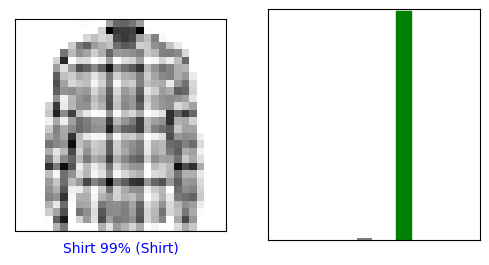

In [41]:
image = 7
test_single_image(xtest, ytest, predictions, image)

In [42]:
# Testing for several images

def test_multi_image(xtest, ytest, predictions, num_rows, num_cols):
    num_images=num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols,2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plt_img(i,predictions, ytest, xtest)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt_val_arr(i, predictions, ytest)
    plt.show()

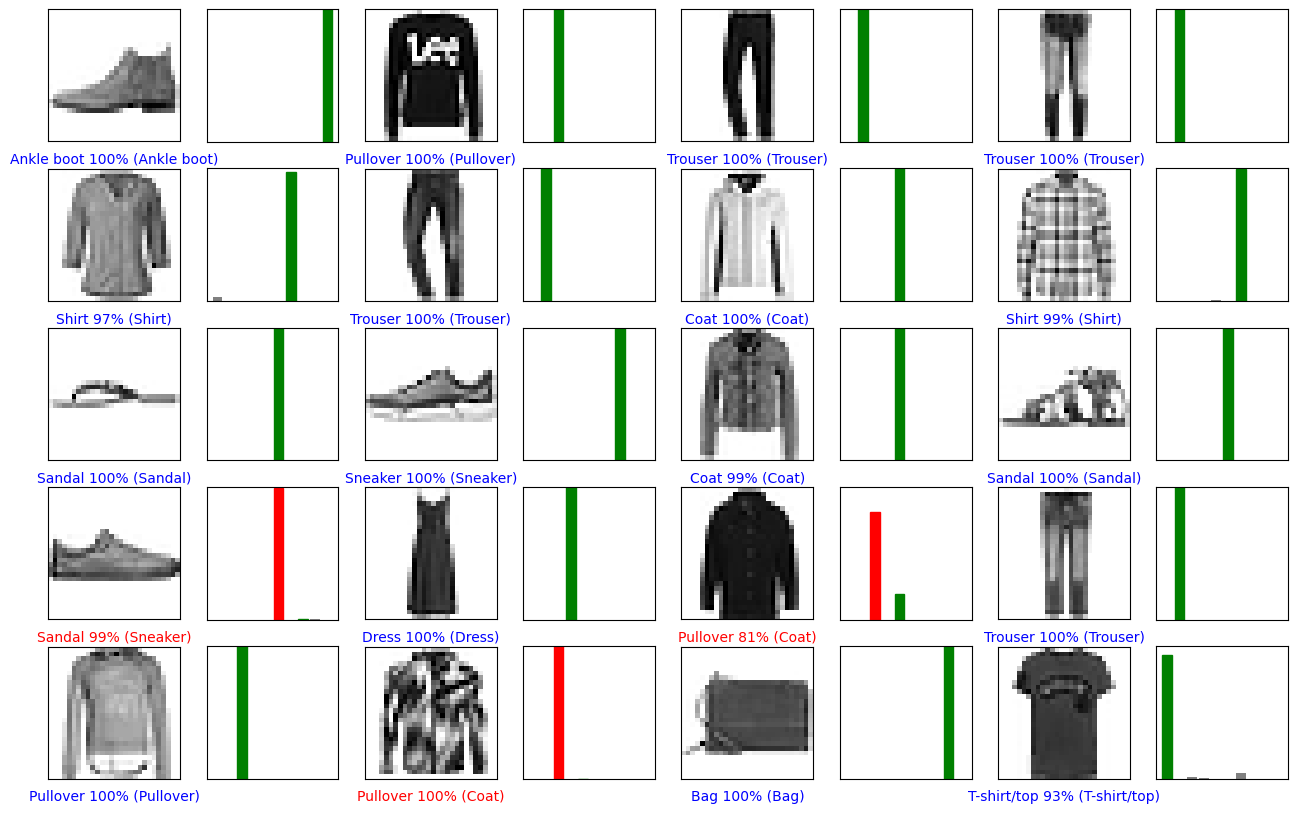

In [43]:
num_rows=5
num_cols=4
test_multi_image(xtest, ytest, predictions, num_rows, num_cols)

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [44]:
##---------Type the code below this line------------------##

# Plotting history graph

def history_plot(history, label):
    fig,axes = plt.subplots(1,1, figsize=(15,8))
    fig.suptitle("The model's evaluation ",fontsize=20)
    axes.plot(history.history['accuracy'])
    axes.plot(history.history['val_accuracy'])
    axes.plot(history.history['loss'])
    axes.plot(history.history['val_loss'])
    axes.set_title(label)
    axes.set_ylabel('Accuracy/Loss')
    axes.set_xlabel('Epoch')
    axes.legend(['Training_accuracy','Validation_accuracy','Training_loss','Validation_loss'])

    plt.show()

In [45]:
print(history.history)

{'loss': [0.14184828102588654, 0.1353401243686676, 0.1322609931230545, 0.129108265042305, 0.12695619463920593, 0.12344750016927719, 0.1200888380408287, 0.11863327026367188, 0.11522342264652252, 0.11294245719909668, 0.11309538781642914, 0.10845710337162018, 0.10783243924379349, 0.10405339300632477, 0.10345409065485, 0.10046551376581192, 0.09904976189136505, 0.09785467386245728, 0.09380866587162018, 0.09360598027706146], 'accuracy': [0.9484166502952576, 0.9518541693687439, 0.953166663646698, 0.9541249871253967, 0.9551458358764648, 0.956291675567627, 0.9572083353996277, 0.9589999914169312, 0.9595000147819519, 0.960812509059906, 0.961062490940094, 0.9626250267028809, 0.9626250267028809, 0.9640833139419556, 0.9648541808128357, 0.9668541550636292, 0.9660416841506958, 0.9665208458900452, 0.9689375162124634, 0.9684374928474426], 'val_loss': [0.12626388669013977, 0.12061513960361481, 0.13227152824401855, 0.12036901712417603, 0.13084650039672852, 0.13219182193279266, 0.12256238609552383, 0.14935

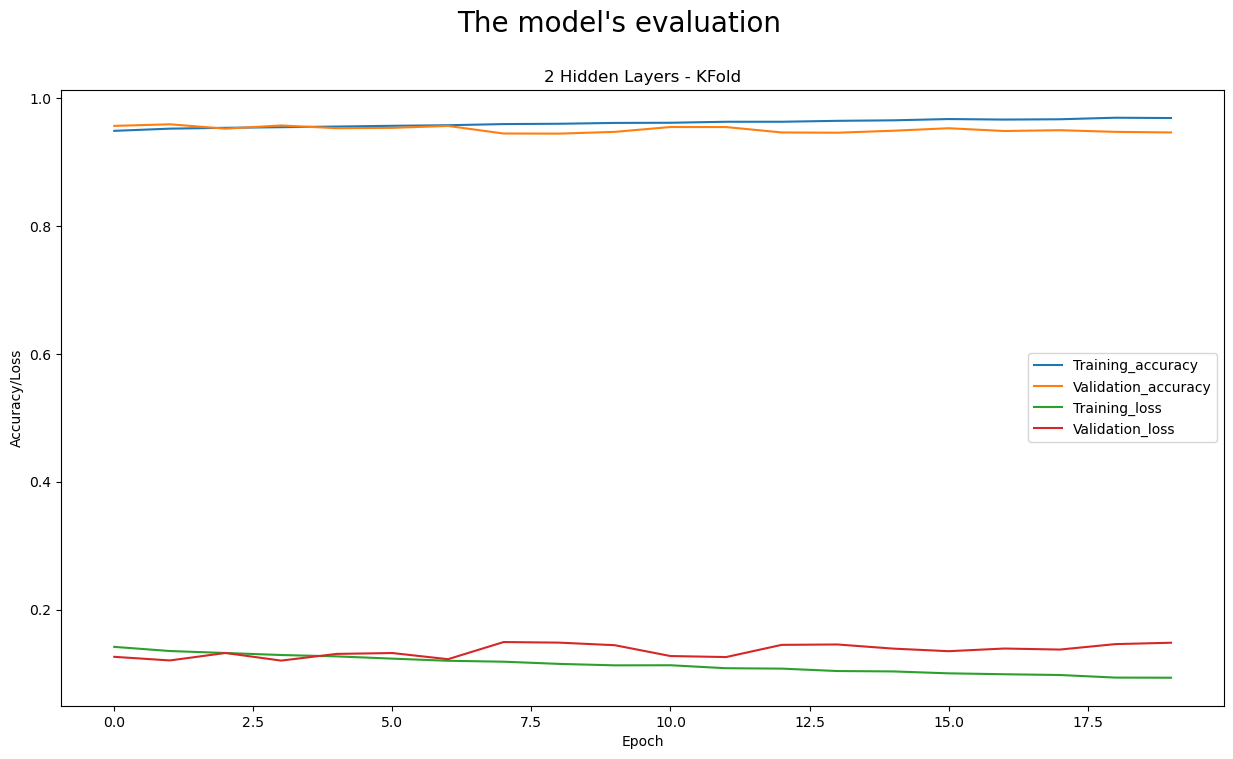

In [46]:
label = "2 Hidden Layers - KFold"
history_plot(history, label)

In [47]:
# Reporting the testing accuracy and loss

print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print("-"*80)
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]} %')
print("-"*80)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print("-"*80)

Score per fold
--------------------------------------------------------------------------------
> Fold 1 - Loss: 0.3535890579223633 - Accuracy: 87.12999820709229 %
--------------------------------------------------------------------------------
> Fold 2 - Loss: 0.3558257222175598 - Accuracy: 87.92999982833862 %
--------------------------------------------------------------------------------
> Fold 3 - Loss: 0.33319613337516785 - Accuracy: 88.84999752044678 %
--------------------------------------------------------------------------------
> Fold 4 - Loss: 0.3538191318511963 - Accuracy: 88.91000151634216 %
--------------------------------------------------------------------------------
> Fold 5 - Loss: 0.36846715211868286 - Accuracy: 88.84999752044678 %
--------------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 88.33399891853333 (+- 0.7038637773126959)
> Loss: 0.352979439496994
-----------------------------------------------

In [48]:
# Creating confusion matrix

def conf_matrix(xtest, ytest, predictions, class_names):
    # Convert predictions classes to one hot vectors 
    pred_labels = np.argmax(predictions, axis = 1) 
    # Convert validation observations to one hot vectors
    true_labels = np.argmax(ytest, axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(true_labels, pred_labels) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt= 'd', 
                xticklabels = class_names, yticklabels = class_names, ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    return true_labels, pred_labels

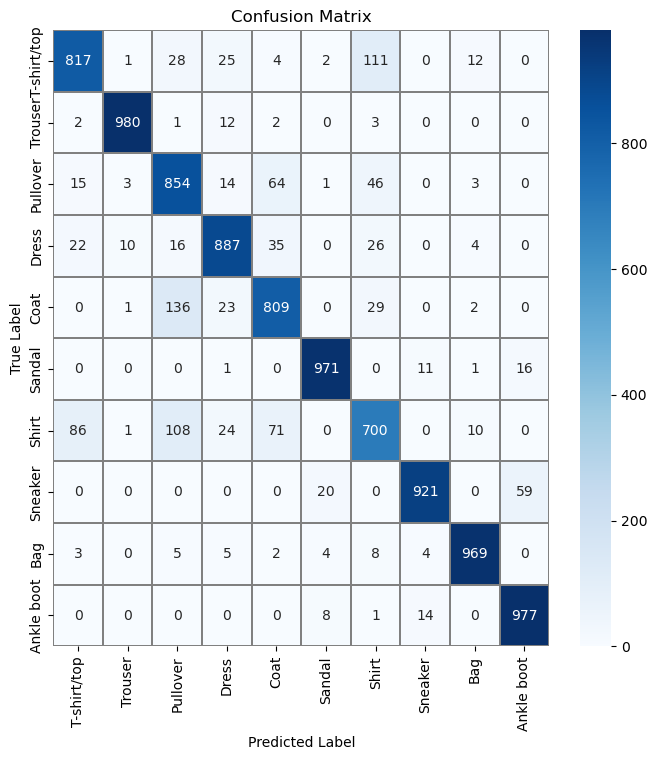

In [49]:
true_labels, pred_labels = conf_matrix(xtest, ytest, predictions, class_names)

In [50]:
# Printing classification report

print(classification_report(true_labels, pred_labels, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.74      0.85      0.80      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.82      0.81      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.97      0.92      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.93      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Observations:

##### Learning Curve:
1. The training accuracy and validation accuracy both increase steadily.
2. Training loss and validation loss decrease which is good.
3. Since validation curves are close to training curves hence we could say the model is good and there is no overfitting.

##### Confusion Matrix:
1. A large number of T-shirt are misclassified as Shirt.
2. Followed by, Pullover wrongly classified as Coat.

##### Classification Report:
If we look at the Precision of the Shirts, we can see that our model predicted less than 80% of Shirts correctly out of the total images it predicted as Shirts. We did conclude the same from the confusion matrix, where we saw that a lot of T-shirts were misclassified as Shirts.

##### Accuracy:
Accuracy given by Train set is 0.96 and Accuracy given by Test set is 0.89, Thus we can we say that our model is overfitting which can be improved by more epochs or by applying optimizers.

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



##### Splitting train in train and validation set
Further splitting the train set in train and validation set. Assigning some images for the validation set. Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset.
Let's use the first 5,000 images of the original training set as the validation set.

In [51]:
# Assigning some images for the validation set

def validate(xtrain, ytrain):
    xvalid, xtrain = xtrain[:5000], xtrain[5000:] 
    yvalid, ytrain = ytrain[:5000], ytrain[5000:]
    
    print("xvalid shape: ", xvalid.shape)
    print("xtrain shape: ", xtrain.shape)
    print("yvalid shape: ", yvalid.shape)
    print("ytrain shape: ", ytrain.shape)
    
    return xvalid, xtrain, yvalid, ytrain


In [52]:
xvalid, xtrain, yvalid, ytrain = validate(xtrain, ytrain)

xvalid shape:  (5000, 28, 28, 1)
xtrain shape:  (55000, 28, 28, 1)
yvalid shape:  (5000, 10)
ytrain shape:  (55000, 10)


In [53]:
##---------Type the code below this line------------------##

# Training Model

def train_model(model, xtrain, ytrain, xvalid, yvalid):
    history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_data=(xvalid, yvalid))
    
    return history
    

In [54]:
##---------Type the code below this line------------------##


# Defining dnn model by decreasing one layer

def define_model_dec_layer(xtrain, num_classes):
    model_dec_layer = keras.models.Sequential()
    model_dec_layer.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_dec_layer.add(keras.layers.Dense(units=256,activation="relu"))
    
    model_dec_layer.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_dec_layer

model_dec_layer = define_model_dec_layer(xtrain, num_classes)

optimizer = "sgd"
compile_model(model_dec_layer, optimizer)  

history_dec_layer = train_model(model_dec_layer, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7414 - accuracy: 0.7656 - val_loss: 0.5432 - val_accuracy: 0.8246
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5135 - accuracy: 0.8258 - val_loss: 0.4792 - val_accuracy: 0.8398
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4693 - accuracy: 0.8374 - val_loss: 0.4478 - val_accuracy: 0.8486
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8465 - val_loss: 0.4372 - val_accuracy: 0.8520
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4269 - accuracy: 0.8525 - val_loss: 0.4141 - val_accuracy: 0.8618
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4122 - accuracy: 0.8571 - val_loss: 0.4123 - val_accuracy: 0.8584
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8615 - val_loss: 0.3909 - val_accuracy:

In [55]:
# Evaluating accuracy and loss of the model

def evaluate_model(model, xtest, ytest):
    test_loss, test_accuracy = model.evaluate(xtest, ytest)
    return test_loss, test_accuracy


In [56]:
# Reporting the testing accuracy and loss

test_loss_dec_layer, test_accuracy_dec_layer = evaluate_model(model_dec_layer, xtest, ytest)

print('Testing accuracy achieved by decreasing one layer: %.4f' % (test_accuracy_dec_layer))
print('Testing loss achieved by decreasing one layer: %.4f' % (test_loss_dec_layer))

313/313 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8628
Testing accuracy achieved by decreasing one layer: 0.8628
Testing loss achieved by decreasing one layer: 0.3861


In [57]:
##---------Type the code below this line------------------##


# defining dnn model by increasing one layer
def define_model_inc_layer(xtrain, num_classes):
    model_inc_layer = keras.models.Sequential()
    model_inc_layer.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_inc_layer.add(keras.layers.Dense(units=256,activation="relu"))
    model_inc_layer.add(keras.layers.Dense(units=128,activation="relu"))
    model_inc_layer.add(keras.layers.Dense(units=64,activation="relu"))
    
    model_inc_layer.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_inc_layer

model_inc_layer = define_model_inc_layer(xtrain, num_classes)
    
optimizer = "sgd"    
compile_model(model_inc_layer, optimizer)  

history_inc_layer = train_model(model_inc_layer, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7636 - accuracy: 0.7474 - val_loss: 0.4994 - val_accuracy: 0.8298
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4908 - accuracy: 0.8261 - val_loss: 0.4744 - val_accuracy: 0.8350
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4391 - accuracy: 0.8432 - val_loss: 0.4143 - val_accuracy: 0.8578
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4085 - accuracy: 0.8537 - val_loss: 0.3835 - val_accuracy: 0.8654
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3864 - accuracy: 0.8627 - val_loss: 0.3724 - val_accuracy: 0.8680
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.8689 - val_loss: 0.3695 - val_accuracy: 0.8708
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3527 - accuracy: 0.8736 - val_loss: 0.3472 - val_accuracy:

In [58]:
# Reporting the testing accuracy and loss

test_loss_inc_layer, test_accuracy_inc_layer = evaluate_model(model_inc_layer, xtest, ytest)

print('Testing accuracy achieved by increasing one layer: %.4f' % (test_accuracy_inc_layer))
print('Testing loss achieved by increasing one layer: %.4f' % (test_loss_inc_layer))

313/313 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8786
Testing accuracy achieved by increasing one layer: 0.8786
Testing loss achieved by increasing one layer: 0.3450


In [59]:

def history_multi_plot(history1, label1, history2, label2, history3, label3):
    fig,axes = plt.subplots(1,3, figsize=(15,8))
    fig.suptitle("The model's evaluation ",fontsize=20)
    axes[0].plot(history1.history['accuracy'])
    axes[0].plot(history1.history['val_accuracy'])
    axes[0].plot(history1.history['loss'])
    axes[0].plot(history1.history['val_loss'])
    axes[0].set_title(label1)
    axes[0].set_ylabel('Accuracy/Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Training_accuracy','Validation_accuracy','Training_loss','Validation_loss'])
    
    axes[1].plot(history2.history['accuracy'])
    axes[1].plot(history2.history['val_accuracy'])
    axes[1].plot(history2.history['loss'])
    axes[1].plot(history2.history['val_loss'])
    axes[1].set_title(label2)
    axes[1].set_ylabel('Accuracy/Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Training_accuracy','Validation_accuracy','Training_loss','Validation_loss'])
    
    axes[2].plot(history3.history['accuracy'])
    axes[2].plot(history3.history['val_accuracy'])
    axes[2].plot(history3.history['loss'])
    axes[2].plot(history3.history['val_loss'])
    axes[2].set_title(label3)
    axes[2].set_ylabel('Accuracy/Loss')
    axes[2].set_xlabel('Epoch')
    axes[2].legend(['Training_accuracy','Validation_accuracy','Training_loss','Validation_loss'])
    
    plt.show()
    


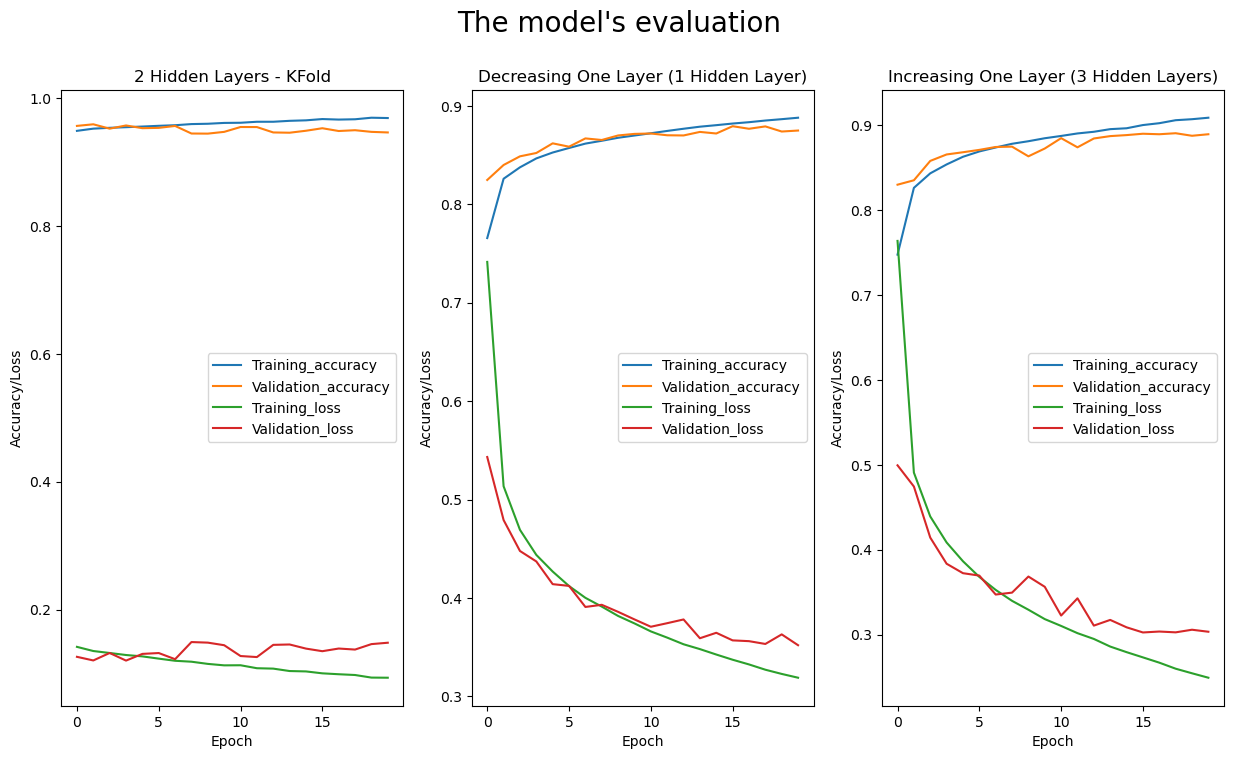

In [60]:
label = "2 Hidden Layers - KFold"
label_dec_layer = "Decreasing One Layer (1 Hidden Layer)"
label_inc_layer = "Increasing One Layer (3 Hidden Layers)"
history_multi_plot(history, label, history_dec_layer, label_dec_layer, history_inc_layer, label_inc_layer)

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [61]:
##---------Type the code below this line------------------##

# defining dnn model by adding Dropout
def define_model_dor(xtrain, num_classes):
    model_dor = keras.models.Sequential()
    model_dor.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_dor.add(keras.layers.Dense(units=256,activation="relu"))
    model_dor.add(keras.layers.Dropout(0.25))
    model_dor.add(keras.layers.Dense(units=128,activation="relu"))
    model_dor.add(keras.layers.Dropout(0.25))
    
    model_dor.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_dor

model_dor = define_model_dor(xtrain, num_classes)
   
optimizer = "sgd"    
compile_model(model_dor, optimizer)  

history_dor = train_model(model_dor, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8864 - accuracy: 0.6909 - val_loss: 0.5435 - val_accuracy: 0.8176
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5842 - accuracy: 0.7958 - val_loss: 0.4688 - val_accuracy: 0.8370
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5127 - accuracy: 0.8185 - val_loss: 0.4281 - val_accuracy: 0.8512
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4741 - accuracy: 0.8326 - val_loss: 0.4017 - val_accuracy: 0.8606
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4492 - accuracy: 0.8418 - val_loss: 0.3868 - val_accuracy: 0.8642
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4310 - accuracy: 0.8464 - val_loss: 0.3801 - val_accuracy: 0.8646
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4165 - accuracy: 0.8515 - val_loss: 0.3694 - val_accuracy:

In [62]:
# Reporting the testing accuracy and loss

test_loss_dor, test_accuracy_dor = evaluate_model(model_dor, xtest, ytest)

print('Testing accuracy achieved by adding Dropout: %.4f' % (test_accuracy_dor))
print('Testing loss achieved by adding Dropout: %.4f' % (test_loss_dor))

313/313 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8727
Testing accuracy achieved by adding Dropout: 0.8727
Testing loss achieved by adding Dropout: 0.3505


In [63]:
##---------Type the code below this line------------------##

# defining dnn model by adding Dropout and L2 regulariser
def define_model_dor_l2(xtrain, num_classes):
    model_dor_l2 = keras.models.Sequential()
    model_dor_l2.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_dor_l2.add(keras.layers.Dense(units=256,activation="relu",kernel_regularizer=keras.regularizers.l2(1e-04)))
    model_dor_l2.add(keras.layers.Dropout(0.25))
    model_dor_l2.add(keras.layers.Dense(units=128,activation="relu",kernel_regularizer=keras.regularizers.l2(1e-04)))
    model_dor_l2.add(keras.layers.Dropout(0.25))
    
    model_dor_l2.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_dor_l2

model_dor_l2 = define_model_dor_l2(xtrain, num_classes)
    
optimizer = "sgd"    
compile_model(model_dor_l2, optimizer)  

history_dor_l2 = train_model(model_dor_l2, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9303 - accuracy: 0.7001 - val_loss: 0.5904 - val_accuracy: 0.8236
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6363 - accuracy: 0.7984 - val_loss: 0.5121 - val_accuracy: 0.8454
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.8225 - val_loss: 0.4793 - val_accuracy: 0.8566
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5337 - accuracy: 0.8319 - val_loss: 0.4604 - val_accuracy: 0.8614
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5093 - accuracy: 0.8402 - val_loss: 0.4464 - val_accuracy: 0.8630
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4900 - accuracy: 0.8452 - val_loss: 0.4325 - val_accuracy: 0.8670
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4733 - accuracy: 0.8511 - val_loss: 0.4214 - val_accuracy:

In [64]:
# Reporting the testing accuracy and loss

test_loss_dor_l2, test_accuracy_dor_l2 = evaluate_model(model_dor_l2, xtest, ytest)

print('Testing accuracy achieved by adding Dropout and L2 regularizer: %.4f' % (test_accuracy_dor_l2))
print('Testing loss achieved by adding Dropout and L2 regularizer: %.4f' % (test_loss_dor_l2))

313/313 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8763
Testing accuracy achieved by adding Dropout and L2 regularizer: 0.8763
Testing loss achieved by adding Dropout and L2 regularizer: 0.4039


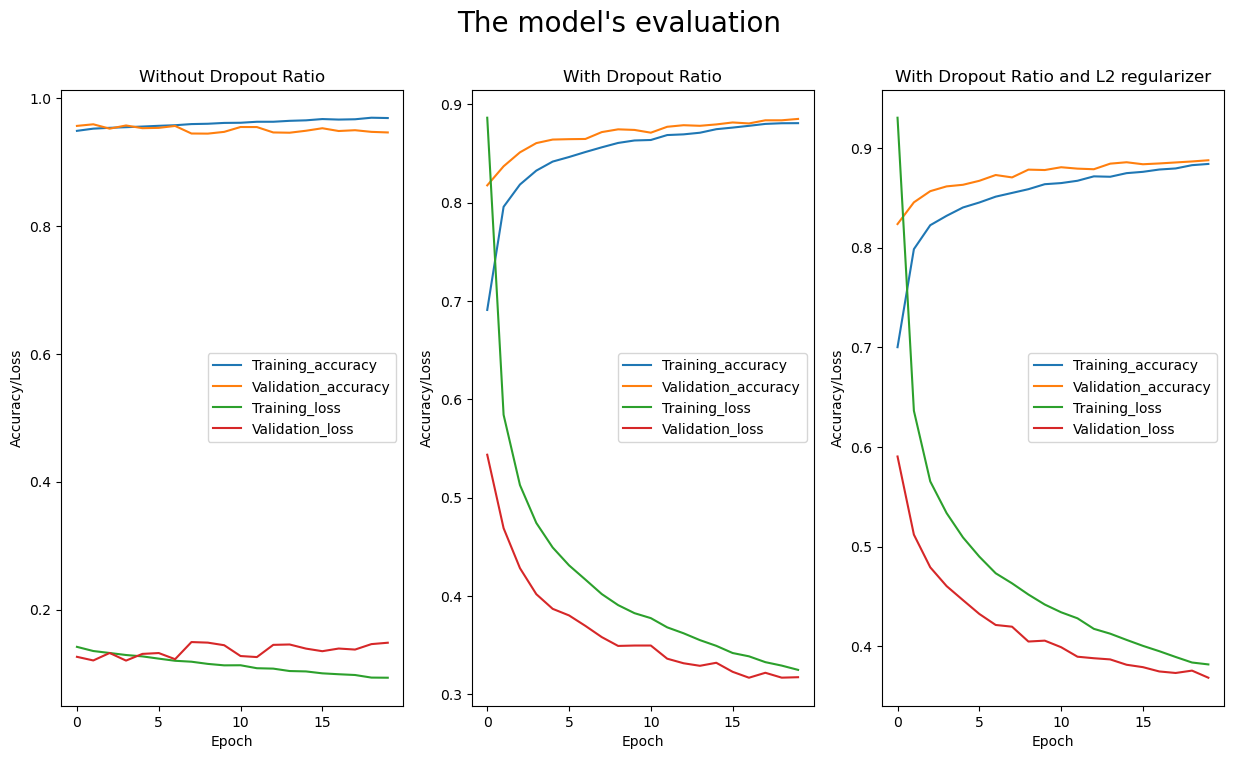

In [65]:
label = "Without Dropout Ratio"
label_dor = "With Dropout Ratio"
label_dor_l2 = "With Dropout Ratio and L2 regularizer"
history_multi_plot(history, label, history_dor, label_dor, history_dor_l2, label_dor_l2)

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [66]:
##---------Type the code below this line------------------##

# defining dnn model by adding RMSProp optimizer
def define_model_rms(xtrain, num_classes):
    model_rms = keras.models.Sequential()
    model_rms.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_rms.add(keras.layers.Dense(units=256,activation="relu"))
    model_rms.add(keras.layers.Dense(units=128,activation="relu"))
    
    model_rms.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_rms

model_rms = define_model_rms(xtrain, num_classes)
    
optimizer = keras.optimizers.RMSprop(learning_rate=1e-04)      
compile_model(model_rms, optimizer)  

history_rms = train_model(model_rms, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6183 - accuracy: 0.7959 - val_loss: 0.4505 - val_accuracy: 0.8450
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4312 - accuracy: 0.8490 - val_loss: 0.3918 - val_accuracy: 0.8664
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3899 - accuracy: 0.8630 - val_loss: 0.3701 - val_accuracy: 0.8698
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3659 - accuracy: 0.8705 - val_loss: 0.3635 - val_accuracy: 0.8740
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3458 - accuracy: 0.8773 - val_loss: 0.3609 - val_accuracy: 0.8716
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3306 - accuracy: 0.8816 - val_loss: 0.3423 - val_accuracy: 0.8790
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3173 - accuracy: 0.8859 - val_loss: 0.3274 - val_accuracy:

In [67]:
# Reporting the testing accuracy and loss

test_loss_rms, test_accuracy_rms = evaluate_model(model_rms, xtest, ytest)

print('Testing accuracy achieved by adding RMSProp optimizer: %.4f' % (test_accuracy_rms))
print('Testing loss achieved by adding RMSProp optimizer: %.4f' % (test_loss_rms))

313/313 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8747
Testing accuracy achieved by adding RMSProp optimizer: 0.8747
Testing loss achieved by adding RMSProp optimizer: 0.3592


In [68]:
##---------Type the code below this line------------------##

# defining dnn model by adding Adam optimizer
def define_model_adam(xtrain, num_classes):
    model_adam = keras.models.Sequential()
    model_adam.add(keras.layers.Flatten(input_shape=[xtrain.shape[1], xtrain.shape[2], xtrain.shape[3]]))
    
    model_adam.add(keras.layers.Dense(units=256,activation="relu"))
    model_adam.add(keras.layers.Dense(units=128,activation="relu"))
    
    model_adam.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    
    return model_adam

model_adam = define_model_adam(xtrain, num_classes)

optimizer = "adam"      
compile_model(model_adam, optimizer) 

history_adam = train_model(model_adam, xtrain, ytrain, xvalid, yvalid)



Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4838 - accuracy: 0.8265 - val_loss: 0.3862 - val_accuracy: 0.8590
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3668 - accuracy: 0.8654 - val_loss: 0.3310 - val_accuracy: 0.8794
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3267 - accuracy: 0.8783 - val_loss: 0.3267 - val_accuracy: 0.8830
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3037 - accuracy: 0.8887 - val_loss: 0.3312 - val_accuracy: 0.8774
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2856 - accuracy: 0.8930 - val_loss: 0.3040 - val_accuracy: 0.8898
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2709 - accuracy: 0.8980 - val_loss: 0.2970 - val_accuracy: 0.8922
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2596 - accuracy: 0.9033 - val_loss: 0.2980 - val_accura

In [72]:
# Reporting the testing accuracy and loss

test_loss_adam, test_accuracy_adam = evaluate_model(model_adam, xtest, ytest)

print('Testing accuracy achieved by adding Adam optimizer: %.3f' % (test_accuracy_adam))
print('Testing loss achieved by adding Adam optimizer: %.3f' % (test_loss_adam))

313/313 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8977
Testing accuracy achieved by adding Adam optimizer: 0.898
Testing loss achieved by adding Adam optimizer: 0.369


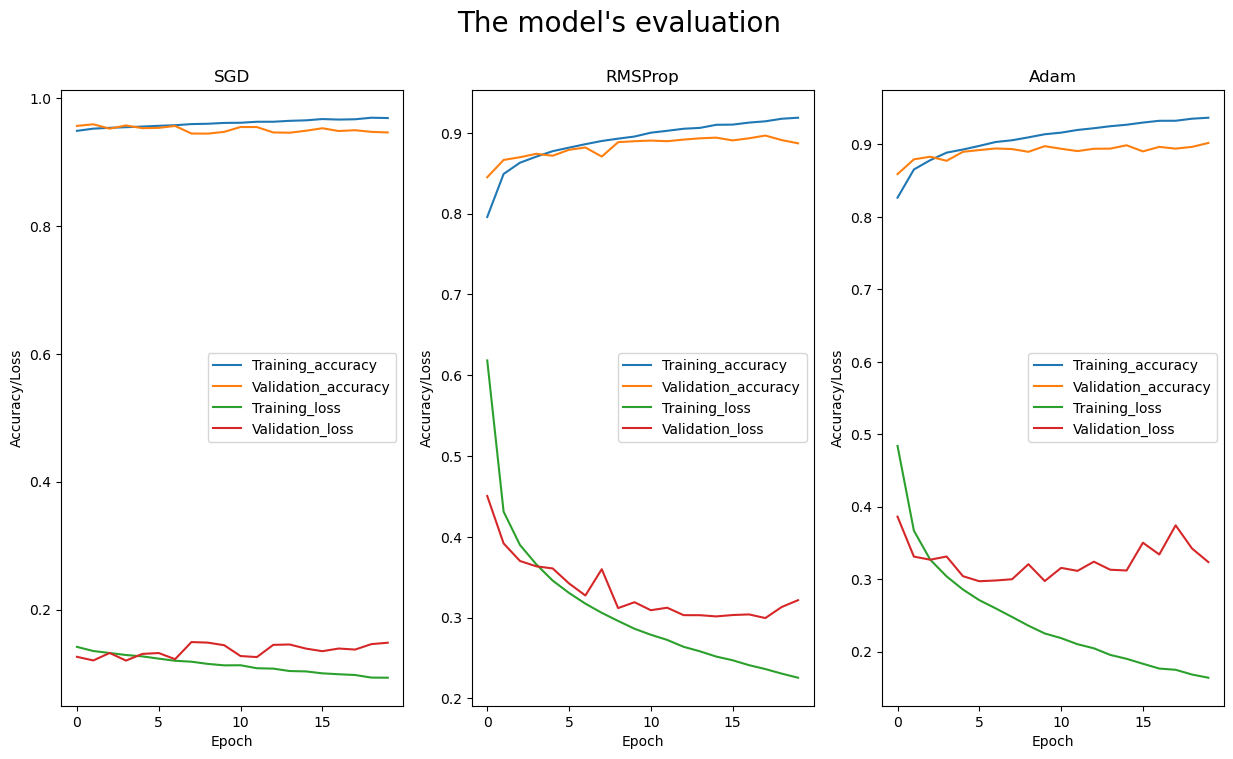

In [73]:
label = "SGD"
label_rms = "RMSProp"
label_adam = "Adam"
history_multi_plot(history, label, history_rms, label_rms, history_adam, label_adam)

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [71]:
##---------Type the code below this line------------------##

### Observations and Conclusion:

#### Observing the Learning Curves, Test Accuracy and Test Loss Below are the points - 

<b>Base Model:</b><br>
Base model is a Sequential model with below properties - <br>
Number of layers:  4<br>
Number of units in each layer:  [256, 128, 10]<br>
Total number of trainable parameters:  235146<br>

<b>Crossvalidation KFold:</b><br>
Testing accuracy achieved by KFold: 0.3530<br>
Testing loss achieved by KFold: 0.8833<br>
The Learning Curve showing an Model which did not do much learning and is capable of further learning and possible further improvements with alternative optimizers and regularizers.

<b>Decreased Dense Layer:</b><br>
Testing accuracy achieved by decreasing one layer: 0.8628<br>
Testing loss achieved by decreasing one layer: 0.3861<br>
Removing a dense layer reduces the model's capacity, especially if the dataset requires a more complex model to capture its underlying patterns and looking at the Learning Curve, we can see our model is slightly overfitting.

<b>Increased Dense Layer:</b><br>
Testing accuracy achieved by increasing one layer: 0.8786<br>
Testing loss achieved by increasing one layer: 0.3450<br>
Adding an extra dense layer may increase the model's capacity to capture more complex patterns in the data. This can potentially improve the model's performance but looking at the Learning Curve, we can see our model is overfitting.

<b>Dropout with ratio 0.25:</b><br>
Testing accuracy achieved by adding Dropout: 0.8727<br>
Testing loss achieved by adding Dropout: 0.3505<br>
Adding dropout can help prevent overfitting by randomly dropping a fraction of the connections between neurons during training. Incorporating dropout with a ratio of 0.25 may provide a good balance between regularization and model performance. Looking at the Learning Curve, we can see our model did good and also had good Testing Accuracy. So, Dropout of ratio (0.25) performed well and this is a good model to go with. 

<b>Dropout with ratio 0.25 and L2 Regularizer:</b><br>
Testing accuracy achieved by adding Dropout and L2 regularizer: 0.8763<br>
Testing loss achieved by adding Dropout and L2 regularizer: 0.4039<br>
Combining dropout with L2 regularization generally have similar effect as using dropout, but with an additional emphasis on weight regularization, it encourages the model to have smaller weights, which can reduce the impact of individual features and prevent overfitting. Using a Dropout of ratio (0.25) alongside L2 regularization with factor (1e-04) did provide a good balance which is evident from the Learning Curve and Testing Accuracy.

<b>RMSProp Optimizer with learning rate 1e-04:</b><br>
Testing accuracy achieved by adding RMSProp optimizer: 0.8747<br>
Testing loss achieved by adding RMSProp optimizer: 0.3592<br>
Choosing the RMSProp optimizer with a lower learning rate generally have a different impact depending on the dataset and model architecture. However, using a learning rate of 1e-04 did result in overfitting of our model.


<b>Adam Optimizer:</b><br>
Testing accuracy achieved by adding Adam optimizer: 0.898<br>
Testing loss achieved by adding Adam optimizer: 0.369<br>
Adam optimizer can potentially improve the model's training process. Adam is known for its adaptive learning rate and momentum, which can speed up convergence and handle sparse gradients effectively. However using Adam did result in overfitting of our model.

##### So, in conclusion we can say, Models with Dropout of ratio and L2 Regularization added did relatively well and are better than other model architectures.

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck